In [3]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

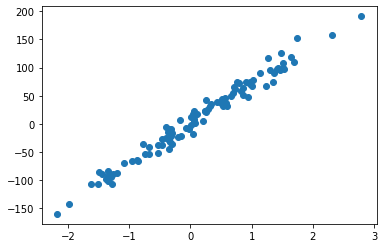

In [5]:
(x,y)= make_regression(n_samples=100,n_features=2,noise=10)

plt.scatter(x[:,1],y) #Jaffiche ma dataset par rapport à la premiere feature

In [18]:
# 1) Je vérifie la taille de la matrice généré par mon dataset
print(x.shape)
y = y.reshape(y.shape[0],1) #Pour bien généré la matrice y
print(y.shape)

(100, 2)
(100, 1)


In [26]:
# 2) Je génere ma Matrice de x et de 1
X = np.hstack((x,np.ones((x.shape[0],1))))
X

array([[ 1.27484721, -0.6778242 ,  1.        ],
       [-0.68653356, -0.07799094,  1.        ],
       [-0.16060649,  0.94102791,  1.        ],
       [-0.57826971, -0.31287575,  1.        ],
       [-0.50210933,  0.57618683,  1.        ],
       [ 1.47510541,  0.69554791,  1.        ],
       [-0.85332921, -0.74276852,  1.        ],
       [ 1.60009166,  0.9129729 ,  1.        ],
       [-0.18635797,  0.96906177,  1.        ],
       [ 0.37437573,  1.73294304,  1.        ],
       [-0.9338524 ,  0.7861937 ,  1.        ],
       [ 0.13800351,  0.76530213,  1.        ],
       [ 0.53310474,  0.86332042,  1.        ],
       [-1.26408641,  1.23184951,  1.        ],
       [-0.65765883, -0.4650682 ,  1.        ],
       [ 1.06494249,  1.6497576 ,  1.        ],
       [-1.03344863,  0.05549064,  1.        ],
       [-0.12611787, -1.37769516,  1.        ],
       [-0.5082966 ,  0.82630199,  1.        ],
       [ 2.12994851, -0.68099589,  1.        ],
       [ 0.22566782,  0.52018426,  1.   

In [27]:
# 3) Je génere de maniere aléatoire les valeurs a et b de ma matrice theta
theta = np.random.randn(3,1)
print(theta.shape)
theta

(3, 1)


array([[ 0.35932709],
       [-1.69634644],
       [ 1.38066682]])

In [10]:
# 4) Je défini la fonction produit de X et Theta
def Model(X,theta):
    return X.dot(theta)

Model(X,theta) 

array([[-1.60394671],
       [-0.05710448],
       [-0.99985516],
       [-0.05219367],
       [-0.52052953],
       [-2.40386052],
       [ 0.39474863],
       [-2.61683179],
       [-0.98856705],
       [-1.84935911],
       [-0.2149267 ],
       [-1.19758351],
       [-1.60711329],
       [-0.10872202],
       [ 0.08938622],
       [-2.45125568],
       [ 0.20423433],
       [ 0.00583767],
       [-0.62672796],
       [-2.39392604],
       [-1.16902856],
       [-0.79341437],
       [-2.02581542],
       [-1.32307359],
       [ 0.48532454],
       [-0.56231494],
       [-2.36997642],
       [-0.18711888],
       [-1.62258539],
       [-0.86293999],
       [-1.15469597],
       [ 0.51617678],
       [ 1.94573308],
       [-1.09772536],
       [-0.02272995],
       [-0.71358436],
       [-0.73167025],
       [-0.18161367],
       [-3.33611025],
       [-1.03458458],
       [-0.80541892],
       [-0.22711659],
       [-1.03823762],
       [-1.27847033],
       [-0.49861366],
       [-0

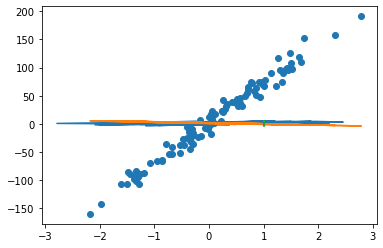

In [28]:
# 5) Jaffiche ma droite de regression par rapport à mon nuage de point
plt.scatter(x[:,1],y)
plt.plot(X,Model(X,theta))

In [29]:
# 6) Je définit ma fonction cout
def Cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((Model(X,theta)-y)**2)

Cost_function(X,y,theta)

2692.434601102247

In [30]:
# 7) Je définis la fonction de gradient
def grad(X,y,theta) :
    m=len(y)
    return 1/m * X.T.dot(Model(X,theta) - y)

In [31]:
# 8) Je définis la fonction de descente de gradient
def descente_gradient(X,y,theta,learning_rate,n_iterations) :
    cost_history = np.zeros(n_iterations) #permet d'afficher ma courbe de decsente de gradient
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = Cost_function(X,y,theta)
    return theta, cost_history


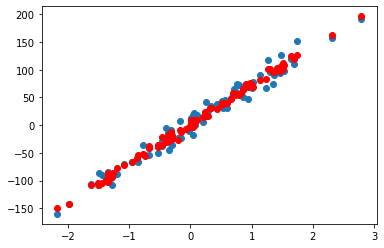

In [33]:
# Marchine learning
theta_final,cost_history = descente_gradient(X,y,theta,learning_rate=0.01,n_iterations=1000)
predictions = Model(X,theta_final)
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],predictions,c="r")

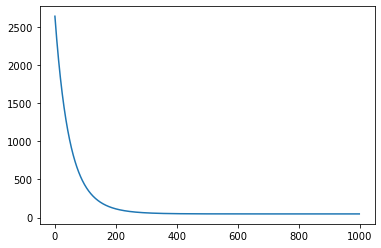

In [34]:
#Ma courbe de descente de gradient
plt.plot(range(1000),cost_history)

In [35]:
#Calcul de coef de determination
def coef_determination(y,predictions) :
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - (u/v)
coef_determination(y,predictions)

0.9806260878429391